In [8]:
#This cell runs through all the images in the folder "interim_crops" and collects their file names,
#then breaks them down into component parts (spp, camera, etc)
import os
import pandas as pd

# Define the root directory
# if this throws errors and can't find the file on the hard drive,
# restart my laptop and leave the external drive plugged in

root_path = '/mnt/d/cv4e_data/interim_crops'

files = os.listdir(root_path) #this creates a list of all the images in this folder (interim_crops)
# print(files)

#initialize an empty dataframe with these columns (all values are NA)
df = pd.DataFrame(columns=['file_name', 'spp', 'camera', 'img_id', 'crop_idx', 'MD_detection']) 

for idx, file_name in enumerate(files): #run through all the files, enumerate takes both idx and file_name (or something else)
    if file_name.startswith('._'): #skip files that are hidden
        continue

    # create objects by breaking apart the file names
    # print(f"file_name : {file_name}") # file_name : aardvark-B05-38121_crop1_animal.JPG [this is for testing]
    spp = file_name.split('-')[0]
    camera = file_name.split('-')[1]
    temp = file_name.split('-')[2] #should be something like 38121_crop1_animal.JPG

    img_id = temp.split('_')[0] #should be 38121
    crop_idx = temp.split('_')[1] #should be crop1
    temp2 = temp.split('_')[2] #should be animal.JPG

    MD_detection = temp2.split('.')[0] #should be animal
    if MD_detection != 'animal': #skip everything that MD said was not animal - this worked
        continue

# append objects to dataframe
    df.at[idx, 'file_name'] = file_name
    df.at[idx, 'spp'] = spp #fill in species column in data frame
    df.at[idx, 'camera'] = camera
    df.at[idx, 'img_id'] = img_id
    df.at[idx, 'crop_idx'] = crop_idx
    df.at[idx, 'MD_detection'] = MD_detection

#this is used for testing
    # if idx > 10:
    #      break

print(df)


                                    file_name         spp camera img_id  \
0         aardvark-B05-38121_crop1_animal.JPG    aardvark    B05  38121   
2         aardvark-B05-38122_crop1_animal.JPG    aardvark    B05  38122   
4         aardvark-B05-38123_crop1_animal.JPG    aardvark    B05  38123   
6         aardvark-B05-38124_crop1_animal.JPG    aardvark    B05  38124   
8         aardvark-B05-38125_crop1_animal.JPG    aardvark    B05  38125   
...                                       ...         ...    ...    ...   
112024  wildebeest-I10-37916_crop1_animal.JPG  wildebeest    I10  37916   
112026  wildebeest-I10-37925_crop1_animal.JPG  wildebeest    I10  37925   
112028  wildebeest-I10-37948_crop1_animal.JPG  wildebeest    I10  37948   
112030  wildebeest-L11-36906_crop1_animal.JPG  wildebeest    L11  36906   
112032  wildebeest-L11-37766_crop1_animal.JPG  wildebeest    L11  37766   

       crop_idx MD_detection  
0         crop1       animal  
2         crop1       animal  
4     

In [9]:
#now can I read in the df? yes, and I shouldn't have to run the cell above again for this set of images
df = pd.read_csv('/root/cv4e/data/cropped_instances.csv')

In [10]:
df['spp'].unique() #testing, checks all the unique items in this list
len(df['spp'].unique()) #testing, gives the number of items in this list

52

In [11]:
#let's try to group the categories I need 
#run through the df and edit the groups (which we had to do for the train/val split)
for idx, row in df.iterrows(): 
    if df.at[idx, 'spp'] in ['snake', 'lizard']:
        df.at[idx, 'spp'] = 'reptile'

    elif df.at[idx, 'spp'] in ['duiker_unknown', 'duiker_common', 'duiker_red']:
        df.at[idx, 'spp'] = 'duiker_spp'

    # this did not do what I thought it should, leaving it so I can think about why later
    # else:
    #     df.at[idx, 'spp'] = df.at[idx, 'spp'] #if not one of the categories I changed, keep the same

df #look at the df

,file_name,spp,camera,img_id,crop_idx,MD_detection
0,aardvark-B05-38121_crop1_animal.JPG,aardvark,B05,38121,crop1,animal
1,aardvark-B05-38122_crop1_animal.JPG,aardvark,B05,38122,crop1,animal
2,aardvark-B05-38123_crop1_animal.JPG,aardvark,B05,38123,crop1,animal
3,aardvark-B05-38124_crop1_animal.JPG,aardvark,B05,38124,crop1,animal
4,aardvark-B05-38125_crop1_animal.JPG,aardvark,B05,38125,crop1,animal
...,...,...,...,...,...,...
56007,wildebeest-I10-37916_crop1_animal.JPG,wildebeest,I10,37916,crop1,animal
56008,wildebeest-I10-37925_crop1_animal.JPG,wildebeest,I10,37925,crop1,animal
56009,wildebeest-I10-37948_crop1_animal.JPG,wildebeest,I10,37948,crop1,animal
56010,wildebeest-L11-36906_crop1_animal.JPG,wildebeest,L11,36906,crop1,animal


In [12]:
print(df['spp'].unique()) #testing unique spp values
len(df['spp'].unique()) #testing length of this list
df.shape #gives you number of rows and columns for the df

['aardvark' 'baboon' 'bat' 'bird_other' 'buffalo' 'bushbaby' 'bushbuck'
 'bushpig' 'civet' 'duiker_spp' 'eland' 'elephant' 'genet'
 'ground_hornbill' 'guineafowl_crested' 'guineafowl_helmeted' 'hare'
 'hartebeest' 'hippo' 'honey_badger' 'impala' 'kudu' 'lion' 'reptile'
 'mongoose_banded' 'mongoose_bushy_tailed' 'mongoose_dwarf'
 'mongoose_large_grey' 'mongoose_marsh' 'mongoose_other'
 'mongoose_slender' 'mongoose_unknown' 'mongoose_white_tailed'
 'monitor_lizard' 'nyala' 'oribi' 'pangolin' 'porcupine' 'reedbuck'
 'rodent' 'sable_antelope' 'samango' 'serval' 'unknown_antelope' 'vervet'
 'warthog' 'waterbuck' 'wildebeest']


(56012, 6)

In [13]:
df = df[df['spp'] != 'bat'] #this is taking everything where spp is not bat
#decided to skip the single bat image because it was making the train/val split harder

#save df so I don't have to run this every time
#this step has to happen here, otherwise it doesn't have the species grouped
df.to_csv('data/cropped_instances.csv', index=False)


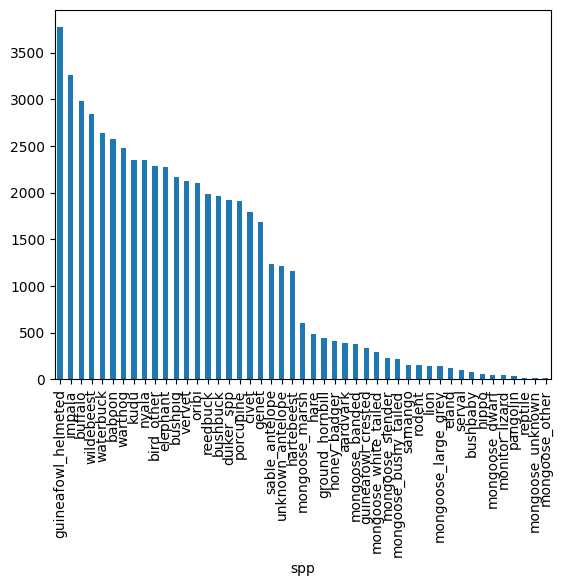

In [6]:
import matplotlib.pyplot as plt #ggplot for python

#plot a histogram of the instances of each spp classification
df["spp"].value_counts().plot(kind = "bar")

plt.show() #show the plot

This is what Peter put into chatgpt to figure out how to get a dictionary in the format necessary for using
the train/val split data. Yielded close to the code below

python. We have this csv ('/root/cv4e/data/cropped_instances.csv') which looks like 

file_name,spp,camera,img_id,crop_idx,MD_detection
aardvark-B05-38121_crop1_animal.JPG,aardvark,B05,38121,crop1,animal
aardvark-B05-38122_crop1_animal.JPG,aardvark,B05,38122,crop1,animal
aardvark-B05-38123_crop1_animal.JPG,aardvark,B05,38123,crop1,animal
aardvark-B05-38124_crop1_animal.JPG,aardvark,B05,38124,crop1,animal
aardvark-B05-38125_crop1_animal.JPG,aardvark,B05,38125,crop1,animal
aardvark-B05-38126_crop1_animal.JPG,aardvark,B05,38126,crop1,animal
aardvark-B05-38127_crop1_animal.JPG,aardvark,B05,38127,crop1,animal
aardvark-B05-38128_crop1_animal.JPG,aardvark,B05,38128,crop1,animal


And we want to have it converted into a nested dict like:

{'location-000': {'bear':4,'wolf':10},
 'location-001': {'bear':12,'elk':20}}



where location is the 'camera' column, and the species names are in the 'spp' col.




In [7]:
#checking whether my df and the csv below are the same

df.sample(4) #looks at the first 4 rows of the df

,file_name,spp,camera,img_id,crop_idx,MD_detection
35046,elephant-I14-12166_crop1_animal.JPG,elephant,I14,12166,crop1,animal
50838,hartebeest-B05-38246_crop2_animal.JPG,hartebeest,B05,38246,crop2,animal
35030,elephant-I12-13705_crop1_animal.JPG,elephant,I12,13705,crop1,animal
86054,reedbuck-M10-26437_crop1_animal.JPG,reedbuck,M10,26437,crop1,animal


In [5]:
#need to reform csv into dictionary to run megadetector function on for splitting train/test
#this code is based on the output from the chatgpt query above
#https://megadetector.readthedocs.io/en/latest/utils.html#megadetector.utils.split_locations_into_train_val.split_locations_into_train_val

import csv
from collections import defaultdict

#to do at some point: switch to iterating over df instead of reading csv
#I think I did this below, going to comment out this cell
#checked and cropped_instances_csv is the same info as df

# Initialize the result dictionary
result = defaultdict(lambda: defaultdict(int))
lookup = defaultdict(lambda: defaultdict(str))

# Path to the CSV file
csv_file = '/root/cv4e/data/cropped_instances.csv'

# Read the CSV file and process each row
with open(csv_file, mode='r') as file:
    reader = csv.DictReader(file)  # Read CSV into a dictionary format
    row_count = 0  # Initialize the row counter
    for row in reader:
        # if row_count >= 10000:  # Check if we've processed 1000 rows
        #     break  # Stop processing if 1000 rows are reached
        location = row['camera']        # Extract the camera (location) value
        species = row['spp']            # Extract the species value
        if species == 'bat': #checking
            continue #skip the bat image
        elif species in ['lizard', 'snake']:
            species_new = "reptile" #assigning an object
        elif species in ['duiker_unknown', 'duiker_common', 'duiker_red']: #grouping all duiker images
            species_new = "duiker_spp"
        else:
            species_new = species
            
        lookup[species] = species_new
        result[location][species_new] += 1  # Increment the count for this species at the location
        row_count += 1  # Increment the row counter

# Convert the defaultdict to a regular dict for cleaner output
#this line of code does the same as below, just slightly less clear
# result = {location: dict(species_count) for location, species_count in result.items()}

location_spp_dict = {}
for location, species_count in result.items():
    # Convert species_count (which is a defaultdict) to a regular dict
    location_spp_dict[location] = dict(species_count)

# Optionally, print the result to check the output
import json
print(json.dumps(location_spp_dict, indent=2))


{
  "B05": {
    "aardvark": 28,
    "baboon": 1,
    "bird_other": 2,
    "buffalo": 85,
    "bushbuck": 1,
    "bushpig": 13,
    "civet": 9,
    "elephant": 15,
    "genet": 5,
    "hare": 16,
    "hartebeest": 463,
    "impala": 33,
    "kudu": 28,
    "mongoose_marsh": 2,
    "mongoose_white_tailed": 4,
    "nyala": 2,
    "oribi": 40,
    "porcupine": 7,
    "reedbuck": 59,
    "sable_antelope": 218,
    "serval": 2,
    "unknown_antelope": 5,
    "vervet": 33,
    "warthog": 12,
    "waterbuck": 11,
    "wildebeest": 71
  },
  "B07": {
    "aardvark": 2,
    "baboon": 25,
    "bird_other": 5,
    "buffalo": 73,
    "bushbuck": 10,
    "bushpig": 11,
    "civet": 24,
    "duiker_spp": 26,
    "elephant": 10,
    "genet": 3,
    "ground_hornbill": 61,
    "guineafowl_helmeted": 18,
    "hare": 5,
    "hartebeest": 29,
    "honey_badger": 3,
    "impala": 54,
    "kudu": 59,
    "lion": 4,
    "mongoose_marsh": 1,
    "mongoose_unknown": 2,
    "mongoose_white_tailed": 36,
    "nya

In [ ]:
#working toward an alphabetical list of categories
#but I think we did this below


In [7]:
#what if I try to run through the df instead of the csv
#can I do it by myself? only time will tell

# Assuming `df` is already your DataFrame

# Step 1: Group by 'camera' and 'spp', then count occurrences
grouped = df.groupby(['camera', 'spp']).size().unstack(fill_value=0)

# Step 2: Convert the result to a nested dictionary, excluding species with 0 counts
camera_species_counts = {
    camera: {species: count for species, count in row.items() if count > 0}
    for camera, row in grouped.iterrows()
}

# Output the result
# print(camera_species_counts)

# Optionally, print the result to check the output
import json
print(json.dumps(camera_species_counts, indent=2))

#this looks like it did the thing we needed it to do



{
  "A06": {
    "baboon": 1,
    "bird_other": 50,
    "buffalo": 9,
    "bushbaby": 3,
    "bushbuck": 1,
    "bushpig": 9,
    "civet": 2,
    "elephant": 1,
    "genet": 17,
    "guineafowl_helmeted": 4,
    "hare": 2,
    "honey_badger": 1,
    "impala": 35,
    "kudu": 12,
    "mongoose_white_tailed": 2,
    "monitor_lizard": 2,
    "oribi": 14,
    "porcupine": 1,
    "reedbuck": 24,
    "unknown_antelope": 6,
    "vervet": 4,
    "warthog": 3,
    "waterbuck": 3,
    "wildebeest": 37
  },
  "A08": {
    "baboon": 46,
    "bird_other": 22,
    "bushbuck": 8,
    "bushpig": 20,
    "civet": 4,
    "elephant": 19,
    "genet": 55,
    "ground_hornbill": 5,
    "guineafowl_helmeted": 20,
    "hare": 2,
    "honey_badger": 20,
    "impala": 17,
    "kudu": 7,
    "mongoose_banded": 4,
    "mongoose_dwarf": 4,
    "mongoose_unknown": 2,
    "mongoose_white_tailed": 6,
    "nyala": 1,
    "oribi": 5,
    "pangolin": 8,
    "porcupine": 17,
    "reedbuck": 24,
    "rodent": 14,
    "sa

In [6]:
dict(lookup).values() #list of all updated species classes

#let's check the dictionary I made 

dict_values(['aardvark', 'baboon', 'bird_other', 'buffalo', 'bushbaby', 'bushbuck', 'bushpig', 'civet', 'duiker_spp', 'duiker_spp', 'duiker_spp', 'eland', 'elephant', 'genet', 'ground_hornbill', 'guineafowl_crested', 'guineafowl_helmeted', 'hare', 'hartebeest', 'hippo', 'honey_badger', 'impala', 'kudu', 'lion', 'reptile', 'mongoose_banded', 'mongoose_bushy_tailed', 'mongoose_dwarf', 'mongoose_large_grey', 'mongoose_marsh', 'mongoose_other', 'mongoose_slender', 'mongoose_unknown', 'mongoose_white_tailed', 'monitor_lizard', 'nyala', 'oribi', 'pangolin', 'porcupine', 'reedbuck', 'reptile', 'rodent', 'sable_antelope', 'samango', 'serval', 'reptile', 'unknown_antelope', 'vervet', 'warthog', 'waterbuck', 'wildebeest'])

In [10]:
#import megadetector module from one directory up
import sys

# Add the parent directory to the sys.path
# sys.path.append('/root') #we know the parent directory is /root
sys.path.append('/root/MegaDetector') #we know the parent directory is /root
#MegaDetector is the repo

# Now you can import the module as usual
#megadetector is a Python module, within that module is a sub-module/directory called "utils", and 
#we think "split_locations_into_train_val" is a Python script
#with a function of the same name that we're going to use
from megadetector.utils.split_locations_into_train_val import split_locations_into_train_val





In [11]:
#in Python: main/positional argument - requires input
#key word/optional arguments - have a default value, you don't *have* to put something in

import random

random.seed(77) #set a seed so it always gives the same

#we tried different max allowable error, this seems to be the smallest one that produces a split that meets
#the constraints
# _ acknowledges that it returns something, but we're not planning to use it

val_locations, _ = split_locations_into_train_val(location_to_category_counts = location_spp_dict, default_max_allowable_error=0.14)

Splitting 47 categories over 60 locations


100%|██████████| 10000/10000 [00:05<00:00, 1816.10it/s]


1 of 10000 random seeds satisfied hard constraints

Val locations:

E12
E10
G10
J07
B09
D07
A08
G04
K04

Val fractions by category:

guineafowl_helmeted (3770) 0.14
impala (3258) 0.15
buffalo (2986) 0.07
wildebeest (2847) 0.02
waterbuck (2642) 0.13
baboon (2571) 0.14
warthog (2480) 0.13
nyala (2348) 0.18
kudu (2348) 0.15
bird_other (2281) 0.08
elephant (2277) 0.16
bushpig (2173) 0.19
vervet (2128) 0.15
oribi (2104) 0.07
reedbuck (1982) 0.13
bushbuck (1963) 0.12
duiker_spp (1920) 0.23
porcupine (1914) 0.06
civet (1789) 0.08
genet (1691) 0.14
sable_antelope (1241) 0.21
unknown_antelope (1210) 0.10
hartebeest (1166) 0.21
mongoose_marsh (607) 0.08
hare (489) 0.03
ground_hornbill (448) 0.17
honey_badger (409) 0.08
aardvark (393) 0.12
mongoose_banded (378) 0.01
guineafowl_crested (333) 0.08
mongoose_white_tailed (296) 0.13
mongoose_slender (234) 0.03
mongoose_bushy_tailed (218) 0.05
samango (154) 0.09
rodent (152) 0.11
lion (142) 0.03
mongoose_large_grey (139) 0.12
eland (121) 0.14
serval (

In [12]:
#now we're going to add a column for train or val for each camera location

df['split'] = pd.NA #creating an empty column in df filled with NAs

for idx, row in df.iterrows(): #iterrows returns both idx and row, idx is the index, row is the stuff in the row
    if df.at[idx, 'camera'] in val_locations:
        df.at[idx, 'split'] = 'val'

    else:
        df.at[idx, 'split'] = 'train'

#val_locations: a list of locations in the validation set

print(df) #seems to work

/tmp/ipykernel_1181/812790983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['split'] = pd.NA #creating an empty column in df filled with NAs


                                    file_name         spp camera img_id  \
0         aardvark-B05-38121_crop1_animal.JPG    aardvark    B05  38121   
2         aardvark-B05-38122_crop1_animal.JPG    aardvark    B05  38122   
4         aardvark-B05-38123_crop1_animal.JPG    aardvark    B05  38123   
6         aardvark-B05-38124_crop1_animal.JPG    aardvark    B05  38124   
8         aardvark-B05-38125_crop1_animal.JPG    aardvark    B05  38125   
...                                       ...         ...    ...    ...   
112024  wildebeest-I10-37916_crop1_animal.JPG  wildebeest    I10  37916   
112026  wildebeest-I10-37925_crop1_animal.JPG  wildebeest    I10  37925   
112028  wildebeest-I10-37948_crop1_animal.JPG  wildebeest    I10  37948   
112030  wildebeest-L11-36906_crop1_animal.JPG  wildebeest    L11  36906   
112032  wildebeest-L11-37766_crop1_animal.JPG  wildebeest    L11  37766   

       crop_idx MD_detection  split  
0         crop1       animal  train  
2         crop1       a

In [15]:
#create categories dictionaries (pairing integers with category string names)
#need to take unique values from spp column of df
categories = []

new_group_list = list(dict(lookup).values()) #this is just a list of all categories we're using
# Val wrote this next line, it goes through and made a list of all the 'new' categories, after we'd combined
# snake/lizard into reptile and all the duiker spp
categories = [{"id": i, "name": sp} for i,sp in zip(range(len(new_group_list)), new_group_list)]


label_map = {} #initializes an empty dictionary to map spp category to index
for dict_ in categories: #go through list of dictionaries, for every dictionary in this list
    # print(dict)
    id = dict_["id"] #this gives the value for the key that is "id" (so numbers starting at 0)
    name = dict_['name'] #this gives the value for the key that is "name" (so all categories)
    label_map[name] = id #assigns a new key value relationship
    # print("")


#initializing train annotations
train_data = {
    "info": { #info is just for me, has information about the JSON
        "description": "train_data",
        "year": 2025,
        "contributor": "Katie, Peter, Val",
        "date_created": "2025-01-15"
    },
    "images": [], #initializes these empty lists
    "annotations": [],
    "categories": []
}


#Train data:
for idx, row in df.iterrows():  #we want the whole row
    # print(row['split'])

    if row['split'] == 'train':
        image = {
            'id': row['file_name'], #unique code for cropped images, used to find file
            'file_name': row['file_name'] #used to link to annotation
        }
        train_data["images"].append(image) #train_data["images"] is a list, initialized above; append every image

        spp = row['spp']

        annotation = {
            "image_id": row['file_name'], #again for cropped images
            "category_id": label_map[spp]
        }
        train_data["annotations"].append(annotation)

train_data['categories'] = categories

import json

#we're working on getting the annotations into the correct format for the ct_classifier stuff
#train_data will contain everything
#need to save it as a JSON file

# save train_data as '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations.json'
train_json_dst_path = '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations.json'
with open(train_json_dst_path, 'w') as json_file: #w is for write, this creates the file
    json.dump(train_data, json_file, indent=2)


#We need to repeat most of the above for val data (we did it for train data)

        
# #this is Talen's version of doing this    
# #     annotation = {  
# #         "image_id": image_id,
# #         "category_id": 1
# #     }
# #     train_data["annotations"].append(annotation)




# # for image_id in false_train.index.tolist():
# #     image = {
# #         "id": image_id,
# #         "file_name": f"{image_id}.jpg",
# #     }
# #     train_data["images"].append(image)
    
# #     annotation = {  
# #         "image_id": image_id,
# #         "category_id": 0
# #     }
# #     train_data["annotations"].append(annotation)
    
# # train_data["categories"] = categories

# # # Now we save the "train_data" as a .json file called "train_annotations" to the local directory:
# # with open('train_annotations.json', 'w') as outfile:
# #     json.dump(train_data, outfile)


# #below is the first attempt at this
# # print(df['spp'].unique())
# # print(location_spp_dict.keys)

# # df['spp'].unique()

# # for class_name in dict(lookup).values():
# #     temp_dict = {
# #         'id': idx, 
# #         'name': class_name
# #     }
# #     idx +=1

# # print(temp_dict)

In [16]:
#need to initialize val data as well

#initializing val annotations
val_data = {
    "info": {
        "description": "val_data",
        "year": 2025,
        "contributor": "Katie, Peter, Val",
        "date_created": "2025-01-16"
    },
    "images": [],
    "annotations": [],
    "categories": []
}


#Val data:
for idx, row in df.iterrows():  #we want the whole row
    # print(row['split'])

    if row['split'] == 'val':
        image = {
            'id': row['file_name'], #unique code for cropped images, used to find file
            'file_name': row['file_name'] #used to link to annotation
        }
        val_data["images"].append(image) #val_data["images"] is a list, initialized above; append every image

        spp = row['spp']

        annotation = {
            "image_id": row['file_name'], #again for cropped images
            "category_id": label_map[spp]
        }
        val_data["annotations"].append(annotation)

val_data['categories'] = categories

import json

#we're working on getting the annotations into the correct format for the ct_classifier stuff
#val_data will contain everything
#need to save it as a JSON file

# save val_data as '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/train_annotations.json'
val_json_dst_path = '/mnt/d/cv4e_data/processed/eccv_18_annotation_files/cis_val_annotations.json'
with open(val_json_dst_path, 'w') as json_file: #w is for write, this creates the file
    json.dump(val_data, json_file, indent=2)

In [ ]:
#ran this above
new_group_list = list(dict(lookup).values())
[{"id": i, "name": sp} for i,sp in zip(range(len(new_group_list)), new_group_list)]

In [ ]:
label_map['baboon']

# move files to remote instance

# execute following command from your wsl
# cv4e:/mnt/class_data/group4/katie/ <- this is where you're moving it
scp /mnt/d/cv4e_data/processed.zip cv4e:/mnt/class_data/group4/katie/

# that took about 7 minutes
# now we have /mnt/class_data/group4/katie/processed.zip on our remote instance
# we have to unzip this now
# run following command from remote instance (took about 1 min)
unzip /mnt/class_data/group4/katie/processed.zip -d /mnt/class_data/group4/katie/





